In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")
 
X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

In [3]:
len(np.unique(y))

6

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#определяем скейлер
scaler = StandardScaler()
#масштабируем данные
X_scaled = scaler.fit_transform(X)
#выводим нужное значение
X_scaled[0][0]

0.2105338541767611

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [7]:
silhouette = []
for i in range(2,10):
    km = KMeans(n_clusters = i, random_state = 42, n_init='auto')
    km.fit(X_scaled)
    #предсказываем метки
    y_pred = km.labels_
    #выводим результат для коэффициента силуэта
    silhouette.append(metrics.silhouette_score(X_scaled,  y_pred))

In [8]:
from matplotlib import pyplot as plt

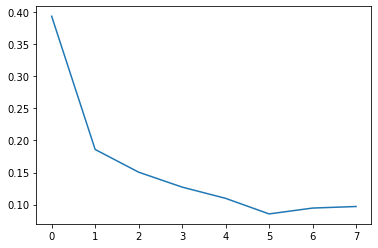

In [9]:
plt.plot(silhouette)

In [10]:
chs = []
dbs = []
for i in range(2,10):
    km = KMeans(n_clusters = i, random_state = 42, n_init='auto')
    km.fit(X_scaled)
    #предсказываем метки
    y_pred = km.labels_
    #выводим результат
    chs.append( metrics.calinski_harabasz_score(X_scaled,y_pred))
    dbs.append( metrics.davies_bouldin_score(X_scaled, y_pred))

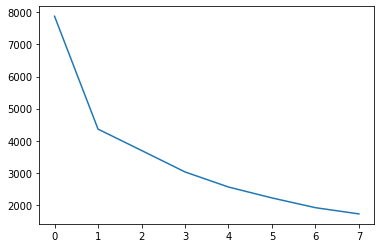

In [11]:
plt.plot(chs)

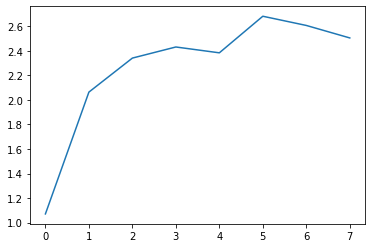

In [12]:
plt.plot(dbs)

In [13]:
km = KMeans(n_clusters = 2, random_state = 42, n_init='auto')
km.fit(X_scaled)
#предсказываем метки
y_pred = km.labels_
#выводим результаты оценки внутренними мерами
print( metrics.silhouette_score(X_scaled,  y_pred))
print( metrics.calinski_harabasz_score(X_scaled,y_pred))
print( metrics.davies_bouldin_score(X_scaled, y_pred))

0.3937324764077081
7880.813903657111
1.0707441822385657


 `-Задание 4.5-`


Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Параметр random_state = 42. В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

In [14]:
km = KMeans(n_clusters = 6, random_state = 42, n_init='auto')
km.fit(X_scaled)
#предсказываем метки
y_pred = km.labels_
#выводим результаты оценки внешними мерами
print( round( metrics.homogeneity_score(y,  y_pred),2))
print( round( metrics.completeness_score(y, y_pred),2))
print( round( metrics.adjusted_rand_score(y, y_pred),2))

0.54
0.58
0.42


In [15]:
km = KMeans(n_clusters = 6, random_state = 42)
km.fit(X_scaled)
#предсказываем метки
y_pred = km.labels_
#создаём таблицу сопряжённости
ct = pd.crosstab(y, y_pred)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
ct

,1,2,3,4,5,6
ходьба,0,903,0,742,77,0
подъём,2,1242,0,295,5,0
спуск,0,321,0,889,196,0
сидение,451,1,91,0,0,1234
стояние,566,0,0,0,0,1340
лежание,330,5,1556,0,0,53


In [17]:
km = KMeans(n_clusters = 2, random_state = 42)
km.fit(X_scaled)
#предсказываем метки
y_pred = km.labels_
#создаём таблицу сопряжённости
ct = pd.crosstab(y, y_pred)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,3))

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
ct

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [19]:
round( metrics.completeness_score(y, y_pred), 2)

0.98

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
ag = AgglomerativeClustering(n_clusters=2).fit(X_scaled)

In [22]:
print("Completeness: %0.3f" % metrics.completeness_score(y, ag.labels_))

Completeness: 1.000


#  5. PCA

In [23]:
np.cov(np.array([3,4,1]),np.array([1,6,2])).sum()

14.333333333333334

In [24]:
from sklearn.decomposition import PCA

In [25]:
A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
 
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)

In [26]:
principalComponents

array([[-1.61145254,  1.76368007,  0.01320928],
       [ 2.08441051,  1.01724955, -0.24417084],
       [-0.29568142, -0.95946326, -0.05272576],
       [-0.50390826, -1.24373821, -0.50808763],
       [ 0.3266317 , -0.57772816,  0.79177495]])

# 7. Снижение размерности. Практика

In [27]:
data = pd.read_csv('data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


 Задание 7.1
1 point possible (graded)
Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя.

In [33]:
data['life_expec'].max()

82.8

 Задание 7.2
1 point possible (graded)
Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data.drop('country',axis =1)  
y = data['country']

X_norm = scaler.fit_transform(X)
round(X_norm[0][0], 2)

1.29

In [48]:
m_c = data.drop(['country'], axis=1).corr()

In [49]:
import seaborn as sns

<AxesSubplot:>

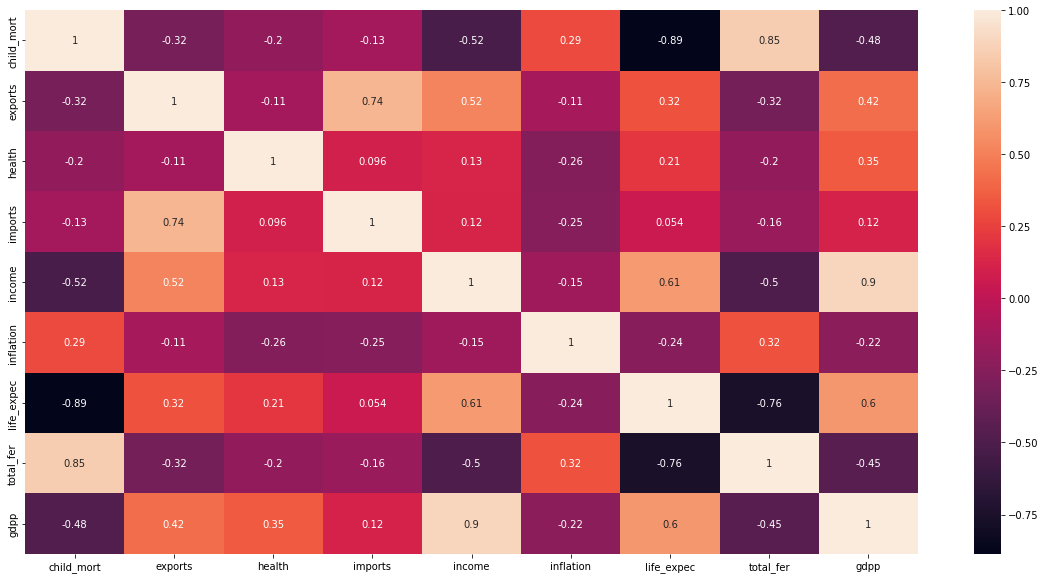

In [51]:
X_scaled_df = pd.DataFrame(X_norm, columns=X.columns)
plt.figure(figsize=(20, 10))
sns.heatmap(X_scaled_df.corr(), annot=True)

In [45]:
m_c.min().min()

-0.8866760973367771

In [61]:
pca = PCA(n_components=0.9, random_state=42).fit(X_norm)
len(pca.components_)

5

In [60]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662]])

In [54]:
pca.explained_variance_ratio_[0]

0.45951739786095924

<AxesSubplot:>

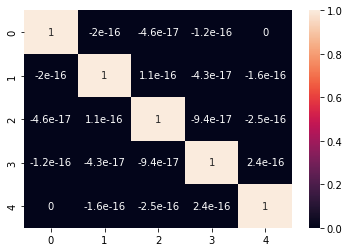

In [62]:
X_pca = pca.fit_transform(X_norm)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [64]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

2 0.3044199499231817
3 0.3079769786519015
4 0.3219583760049837
5 0.24979547358010437
6 0.2557148132818497
7 0.2758360485001675
8 0.26830308166768574
9 0.26461735875621056
10 0.2433095017766679


d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
X_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [67]:
kmeans = KMeans(n_clusters=4, random_state = 1)
kmeans.fit(X_pca)
y_pred = kmeans.labels_

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [91]:
data['label'] = y_pred

In [92]:
data.groupby(by='label')[['child_mort','gdpp']].mean().sort_values(by=['child_mort','gdpp'], ascending=(False,True))

,child_mort,gdpp
label,,
1,92.961702,1922.382979
0,21.690588,6519.552941
3,5.181250,42118.750000
2,4.133333,57566.666667


In [97]:
data[data['label'] == 1].sort_values(by=['life_expec'], ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
166,Zambia,83.1,37.00,5.89,30.9,3280,14.000,52.0,5.40,1460,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
137,South Africa,53.7,28.60,8.94,27.4,12000,6.350,54.3,2.59,7280,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,1
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1


In [98]:
data[data['country'] == 'Russia']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
125,Russia,10.0,29.2,5.08,21.1,23100,14.2,69.2,1.57,10700,0
